# Various methods of community detection

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import string
import random
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph 

import community
# import jgraph as igraph
import leidenalg
import igraph as ig
# import oslom

In [2]:
def ccomp(A,B):
    eds=[]
    A1=set(A.keys())
    B1=set(B.keys())
    for i in A1:
        x=set(A[i])
        for j in B1:
            y=set(B[j])
            sd=sorted(list(x.symmetric_difference(y)))
            ss=sorted(list(set(list(x)+list(y))))
            if A[i]==B[j]:
                eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),1.))
            else:
                if len(sd)/float(len(ss))==1:
                    eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),0.))
                else:
                    eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),len(sd)/float(len(ss))))
    H = nx.Graph()
    H.add_weighted_edges_from(eds)
    H.remove_edges_from([e for e in H.edges(data=True) if e[2]['weight']==0.])       
    return H

def compw(x,y):
    for edge in G0.edges(data=True):
        if edge[0]==x and edge[1]==y:
            return edge[2]['weight']
        elif edge[1]==x and edge[0]==y:
            return edge[2]['weight']

## Robotic Data

In [3]:
# df = pd.read_csv("nodes_edges.csv", dtype='unicode')
df = pd.read_csv("/Volumes/2 TB Seagate Bac/Data_etc/nodes_edges.csv", dtype={'Node1': np.int64, 'Node2': np.int64,'Weight':np.int64})
print "Number of rows =", len(df)
df.head(10)

Number of rows = 419986


,Node1,Node2,Weight
0,0,1,425
1,0,2,385
2,0,3,364
3,0,4,331
4,0,5,315
5,0,6,320
6,0,7,316
7,0,8,306
8,0,9,296
9,0,10,307


In [11]:
# import time
# start = time.clock()

# eds=[]
# for i in range(len(df)):
#     a=df.iloc[i]["Node1"]
#     b=df.iloc[i]["Node2"]
#     c=df.iloc[i]["Weight"]
#     eds.append((int(a),int(b),int(c)))
# print len(eds)

# G = nx.Graph()
# G.add_weighted_edges_from(eds)
# G.remove_edges_from([e for e in G.edges(data=True) if e[2]['weight']==0])

# n=len(G.nodes())
# m=len(G.edges())
# print "The graph of robotic data has %i nodes and %i edges" %(n,m) 
# if n*(n-1)/2.==float(m):
#     print "This graph is complete"
# else:
#     print "This graph is not complete"
#     if nx.is_connected(G)==True:
#         print "This graph is connected"
#     else:
#         print "This is not connected and the number of connected components =", nx.number_connected_components(G)

# nx.write_gpickle(G, "robot.gpickle")
        
# print "computed in",time.clock() - start #4.62 mins

In [4]:
G0 = nx.read_gpickle("robot.gpickle")

gedges=G0.edges(data=True)
n=len(G0.nodes())
m=len(G0.edges())
giant = max(nx.connected_component_subgraphs(G0), key=len)
print "The graph of robotic data has %i nodes and %i edges" %(n,m) 
if n*(n-1)/2.==float(m):
    print "This graph is complete"
else:
    print "This graph is not complete"
    if nx.is_connected(G0)==True:
        print "This graph is connected"
    else:
        print "This is not connected and the number of connected components =", nx.number_connected_components(G0)
        print "The giant conected component of this graph has %i nodes and %i edges" %(len(giant.nodes()),len(giant.edges()))

The graph of robotic data has 917 nodes and 409965 edges
This graph is not complete
This is not connected and the number of connected components = 12
The giant conected component of this graph has 906 nodes and 409965 edges


In [13]:
# giant = max(nx.connected_component_subgraphs(G), key=len)
# nx.write_gpickle(giant, "robotgiant.gpickle")
# giant = nx.read_gpickle("robotgiant.gpickle")
# print "Giant connected component", len(giant.nodes()),len(giant.edges())

## Louvain communities of robotic data

The graph has 20 Louvain communities and modularity coefficient equal to 0.00133023694135
Community 0 with 173 nodes: [57, 65, 66, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 495, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 576, 584, 585]
Community 1 with 12

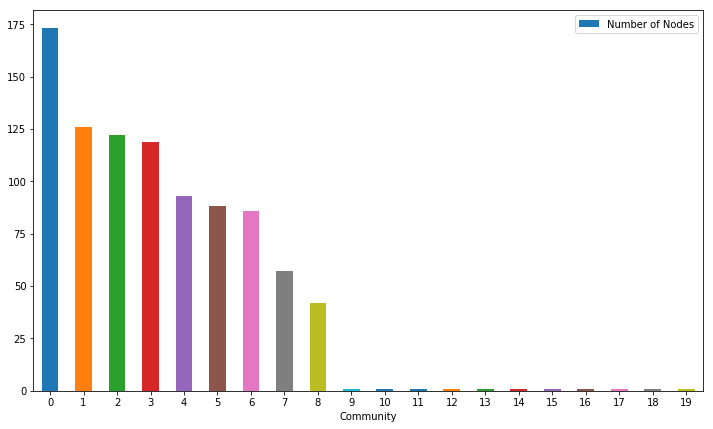

In [6]:
G=G0

partition = community.best_partition(G)

kk=len(set(partition.values()))

modularity=community.modularity(partition, G, weight='weight')
print 'The graph has', kk, 'Louvain communities and modularity coefficient equal to', modularity
cml=[]
for j in range(kk):
    cj=[]
    for k,v in partition.items():
        if v==j:
            cj.append(k)
    cml.append(cj)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
commsd={}
louvain_comm_membership={}
for i in eocmd:
    print 'Community', i[0], 'with', i[1][1], 'nodes:', list(i[1][0])
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    louvain_comm_membership[i[0]]=ts
    
ddf=pd.DataFrame(commsd.items(), columns=['Community', 'Number of Nodes'])
ddf.plot.bar(x='Community', y='Number of Nodes', figsize=(12,7),rot=0);

In [10]:
x=351
y=420
print x,y, "have weight", compw(x,y)
x=350
y=351
print x,y, "have weight", compw(x,y)
x=420
y=421
print x,y, "have weight", compw(x,y)

351 420 have weight 293
350 351 have weight 367
420 421 have weight 380


## Leiden communities of robotic data

The graph has 21 Louvain communities and modularity coefficient equal to 0.00136224379991
Community 0 with 342 nodes: [45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 

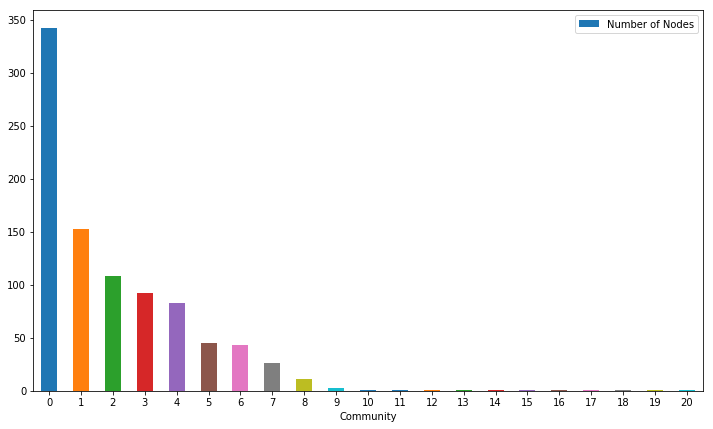

In [15]:
G=G0

g = ig.Graph(directed=False)

nodelist = list(G.nodes())
nodelist.sort()
g.add_vertices(G.nodes())
g.add_edges(G.edges())
g.es["weight"]=[e[2]['weight'] for e in G.edges(data=True)]

# mapping = {old_label:new_label for new_label, old_label in enumerate(G.nodes())}
# H = nx.relabel_nodes(G, mapping)
# g.add_vertices(H.nodes())
# g.add_edges(H.edges())

# partition = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition);
partition = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition, weights='weight');

# mpart=[]
# for i in list(partition):
#     t=[]
#     for j in i:
#         for k,v in mapping.items():
#             if v==j:
#                 t.append(k)
#     mpart.append(t)


kk=len(list(partition))

cml=list(partition)
partd={}
for i,j in list(enumerate(cml)):
    for jj in j:
        partd[jj]=i
modularity=community.modularity(partd, G, weight='weight')
print 'The graph has', kk, 'Louvain communities and modularity coefficient equal to', modularity


# cml=mpart

cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
commsd={}
leiden_comm_membership={}
for i in eocmd:
    print 'Community', i[0], 'with', i[1][1], 'nodes:', list(i[1][0])
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    leiden_comm_membership[i[0]]=ts
    
ddf=pd.DataFrame(commsd.items(), columns=['Community', 'Number of Nodes'])
ddf.plot.bar(x='Community', y='Number of Nodes', figsize=(12,7),rot=0);

### Comparison/Similarities of Louvain-Leiden Communities

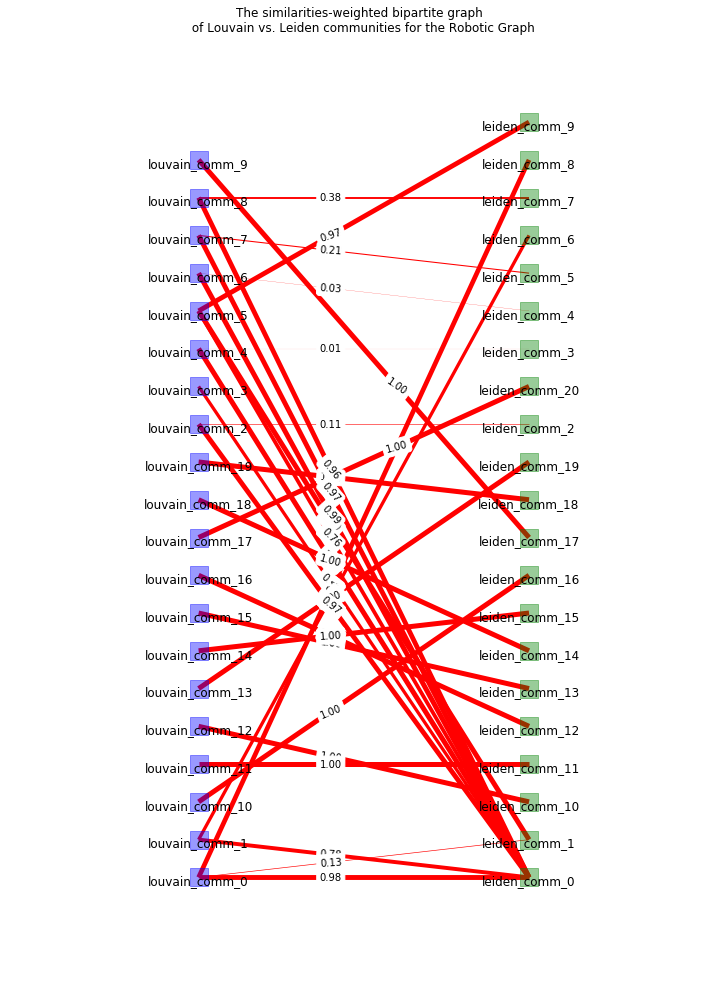

In [16]:
H=ccomp(louvain_comm_membership,leiden_comm_membership)

posbp={}
louvain=sorted([n for n in H.nodes() if "louvain" in n])
leiden=sorted([n for n in H.nodes() if "leiden" in n])
for n in H.nodes():
    for i,j in list(enumerate(louvain)):
        posbp[j]=(0,i)
    for i,j in list(enumerate(leiden)):
        posbp[j]=(1,i)
elabels={}
elabels = nx.get_edge_attributes(H,'weight')
elabelsc={}
for k,v in elabels.items():
    elabelsc[k]='%.02f' %v 
elabels=elabelsc
edge_width=[e[2]['weight'] for e in H.edges(data=True)]
edge_width=[5*w for w in edge_width]
plt.figure(figsize=(12,17));
nodes1 = nx.draw_networkx_nodes(H, posbp, nodelist=louvain,node_color="b",node_shape='s',alpha=0.4)
nodes2 = nx.draw_networkx_nodes(H, posbp, nodelist=leiden,node_color="g",node_shape='s',alpha=0.4)
nx.draw_networkx_edges(H, posbp, edge_color="r",width=edge_width, alpha=1.)
# nx.draw_networkx_labels(H, posbp)
nx.draw_networkx_edge_labels(H,posbp,edge_labels=elabels,label_pos = 0.4);
plt.axis('off');
yoffset = {}
y_off = -0.1  # offset on the y axis
for k, v in posbp.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(H, yoffset);
plt.margins(x=0.5, y=0.1)
plt.title("The similarities-weighted bipartite graph \n of Louvain vs. Leiden communities for the Robotic Graph");

In [17]:
sim1=[]
sim2=[]
sim3=[]
for e in H.edges(data=True):
    if e[2]['weight']==1:
        sim1.append(e)
    if e[2]['weight']<1 and e[2]['weight']>=0.5:
        sim2.append(e)
    if e[2]['weight']<0.5 and e[2]['weight']>0:
        sim3.append(e)
print "There are %i pairs of completely similar communities" %len(sim1)
print "There are %i pairs of communities having percentage of identical nodes >=50%% and <100%%" %len(sim2)
print "There are %i pairs of communities having percentage of identical nodes <50%% and >0%%" %len(sim3)
r=len(louvain_comm_membership)*len(leiden_comm_membership)-len(sim1)-len(sim2)-len(sim3)
print "There are %i pairs of completely dissimilar communities" %r

There are 11 pairs of completely similar communities
There are 13 pairs of communities having percentage of identical nodes >=50% and <100%
There are 6 pairs of communities having percentage of identical nodes <50% and >0%
There are 390 pairs of completely dissimilar communities


In [18]:
# sdf=df.sample(frac=0.00011)
# print "Number of sampled rows =", len(sdf)
# sdf.head(10)

In [19]:
# eds=[]
# for i in range(len(sdf)):
#     a=sdf.iloc[i]["Node1"]
#     b=sdf.iloc[i]["Node2"]
#     c=sdf.iloc[i]["Weight"]
#     eds.append((int(a),int(b),int(c)))
# len(eds)

In [20]:
# G = nx.Graph()
# G.add_weighted_edges_from(eds)

# print len(G.nodes()) #, 'nodes:', G.nodes() 
# print len(G.edges()) #, 'edges:', G.edges(data=True)
# print "Is connected",nx.is_connected(G)
# print "number of connected components =", nx.number_connected_components(G)
# giant = max(nx.connected_component_subgraphs(G), key=len)
# print "Giant connected component", len(giant.nodes()),len(giant.edges())

In [21]:
# pos=graphviz_layout(G);

# plt.figure(figsize=(5,5));
# nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
# nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
# nx.draw_networkx_labels(G, pos)
# plt.axis('off');